In [3]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np
import env
import matplotlib.pyplot as plt
import os
import prepare
import acquire
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
titan_df = acquire.get_titanic_data()
titan_df = prepare.clean_titanic(titan_df)

In [49]:
titan_df = titan_df.drop(titan_df.columns[0], axis = 1)

In [50]:
train, val, test = prepare.train_val_test(titan_df)
train.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
445,1,1,male,0,2,81.8583,Southampton,0,1,0,1
650,0,3,male,0,0,7.8958,Southampton,1,1,0,1
172,1,3,female,1,1,11.1333,Southampton,0,0,0,1
450,0,2,male,1,2,27.7500,Southampton,0,1,0,1
314,0,2,male,1,1,26.2500,Southampton,0,1,0,1


What is your baseline prediction?

In [51]:
#baseline is survived = 0 across the board
train['baseline'] = 0
train.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
445,1,1,male,0,2,81.8583,Southampton,0,1,0,1,0
650,0,3,male,0,0,7.8958,Southampton,1,1,0,1,0
172,1,3,female,1,1,11.1333,Southampton,0,0,0,1,0
450,0,2,male,1,2,27.7500,Southampton,0,1,0,1,0
314,0,2,male,1,1,26.2500,Southampton,0,1,0,1,0


 What is your baseline accuracy? 

In [52]:
base_acu = (train.survived == train.baseline).mean()
base_acu

0.6292134831460674

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [53]:
x_train = train.drop(columns = ['survived','baseline','sex','embark_town'])
y_train = train['survived']
x_val = val.drop(columns = ['survived','sex','embark_town'])
y_val = val['survived']
x_test = test.drop(columns = ['survived','sex','embark_town'])
y_test = test['survived']





In [54]:
seed = 42

clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [55]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [56]:
clf.score(x_train, y_train)

0.8105939004815409

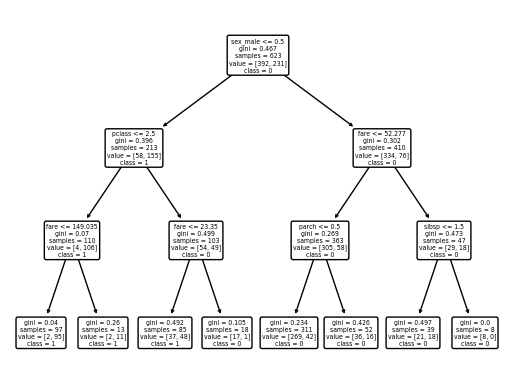

In [60]:
plot_tree(clf, feature_names = x_train.columns, class_names= np.array(clf.classes_).astype('str').tolist(), rounded = True)
plt.show()

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [77]:
clf.score(x_train, y_train)
clf2.score(x_val, y_val)

0.8059701492537313

In [67]:
y_preds = pd.DataFrame({'y_act':y_train, 'baseline': 0, 'model_1': clf.predict(x_train)})
y_preds
confusion_matrix(y_preds.y_act, y_preds.model_1)

array([[351,  41],
       [ 77, 154]])

In [71]:
print(classification_report(y_preds.y_act, y_preds.model_1))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       392
           1       0.79      0.67      0.72       231

    accuracy                           0.81       623
   macro avg       0.80      0.78      0.79       623
weighted avg       0.81      0.81      0.81       623



Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 using a different max_depth value.

In [107]:
clf2 = DecisionTreeClassifier(max_depth = 7, random_state = 42)
clf2.fit(x_train,y_train)
print(clf2.score(x_train, y_train),clf.score(x_train, y_train))
print(clf2.score(x_val, y_val),clf.score(x_val, y_val))

0.8892455858747994 0.8105939004815409
0.8582089552238806 0.8208955223880597


In [108]:
y_preds2 = pd.DataFrame({'y_act':y_train, 'baseline': 0, 'model_2': clf2.predict(x_train)})
y_preds2
confusion_matrix(y_preds2.y_act, y_preds2.model_2)

array([[372,  20],
       [ 49, 182]])

In [109]:
print(classification_report(y_preds2.y_act, y_preds2.model_2))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       392
           1       0.90      0.79      0.84       231

    accuracy                           0.89       623
   macro avg       0.89      0.87      0.88       623
weighted avg       0.89      0.89      0.89       623



Which model performs better on your in-sample data?

In [110]:
#model_2

In [111]:
m1 = (y_preds.y_act == y_preds.model_1).mean()
m1

0.8105939004815409

In [112]:
m2 = (y_preds2.y_act == y_preds2.model_2).mean()
m2

0.8892455858747994

Which model performs best on your out-of-sample data, the validate set?

In [ ]:
#model_1

Work through these same exercises using the Telco dataset.

In [113]:
telco_db = acquire.get_telco_data()

telco_db.

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check
